# Library

In [1]:
# Library Scrapping 
# pip install requests
# pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Get Content HTML

In [2]:
# First of all we need to check the capability of the website ("https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc") to be scrapped
Link  = 'https://www.entoin.com/entertainment/best-anime-to-watch'
page = requests.get(Link)

# Check the status of the website
# Check Status Code (check at : https://developer.mozilla.org/en-US/docs/Web/HTTP/Status)
page.status_code

200

In [3]:
# Check Content
# page.text

# Parsing HTML

In [4]:
#Start Parsing using "HTML-5" parser
soup = BeautifulSoup(page.content, "html.parser")
# soup.head()

# Inspect Element form Web and extract the content

In [5]:
# Search judul and anime  in the website
judul = soup.find_all("h2")
anime = soup.find_all('div', 
                      attrs={'class': 'sptable'})


# Check the length of the anime and judul
display(len(judul), len(anime))

# get the title and rank, beda nama ternyata
dataA = pd.DataFrame([judul[i].text.split(". ") for i in range(100)], 
                     columns=["Rank", "Title"])
display(dataA.head())

100

89

,Rank,Title
0,100,Seraph Of The End
1,99,Lucky Star
2,98,Cardcaptor Sakura
3,97,Miss Kobayashi's Dragon Maid
4,96,Seven Deadly Sins


In [6]:
# get the table on each bla2 bla
rows = anime[0].find_all("tr")
kolom, data = [], []

# list coprehension, then
# ambil teks dalam tabel, hilangkan baris kosong, split berdasar enter
[kolom.append(item.text.strip().split("\n")[0]) 
    for i,item in enumerate(rows) if i>0]

# data
for j,k in enumerate(anime):
    rows = anime[j].find_all("tr")
    [data.append(item.text.strip().split("\n")[1]) 
     for i,item in enumerate(rows) if i>0]

data2 = np.array(data).reshape(89,7)
data2 = pd.DataFrame(data2, columns=kolom)
display(data2)

,Title,Type,Studios,Premiered,Source,MAL Score,Duration
0,Owari no Seraph,TV,Wit Studio,"Apr 4, 2015 to Jun 20, 2015",Manga,7.491,23 min. per ep.
1,Lucky Star,TV,Kyoto Animation,"Apr 8, 2007 to Sep 17, 2007",4-koma manga,7.751,24 min. per ep.
2,Cardcaptor Sakura,TV,Madhouse,"Apr 7, 1998 to Mar 21, 2000",Manga,8.151,25 min. per ep.
3,Kobayashi-san Chi no Maid Dragon,TV,Kyoto Animation,"Jan 12, 2017 to Apr 6, 2017",Manga,7.991,24 min. per ep.
4,Nanatsu no Taizai,TV,A-1 Pictures,"Oct 5, 2014 to Mar 29, 2015",Manga,7.801,24 min. per ep.
...,...,...,...,...,...,...,...
84,Death Note,TV,Madhouse,"Oct 4, 2006 to Jun 27, 2007",Manga,8.631,23 min. per ep.
85,Hunter x Hunter (2011),TV,Madhouse,"Oct 2, 2011 to Sep 24, 2014",Manga,9.071,23 min. per ep.
86,Steins;Gate,TV,White Fox,"Apr 6, 2011 to Sep 14, 2011",Visual novel,9.101,24 min. per ep.
87,Fullmetal Alchemist: Brotherhood,TV,Bones,"Apr 5, 2009 to Jul 4, 2010",Manga,9.171,24 min. per ep.


In [7]:
### Data Preprocess

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      89 non-null     object
 1   Type       89 non-null     object
 2   Studios    89 non-null     object
 3   Premiered  89 non-null     object
 4   Source     89 non-null     object
 5   MAL Score  89 non-null     object
 6   Duration   89 non-null     object
dtypes: object(7)
memory usage: 5.0+ KB


,Title,Type,Studios,Premiered,Source,MAL Score,Duration
0,Owari no Seraph,TV,Wit Studio,"Apr 4, 2015 to Jun 20, 2015",Manga,7.491,23 min. per ep.
1,Lucky Star,TV,Kyoto Animation,"Apr 8, 2007 to Sep 17, 2007",4-koma manga,7.751,24 min. per ep.
2,Cardcaptor Sakura,TV,Madhouse,"Apr 7, 1998 to Mar 21, 2000",Manga,8.151,25 min. per ep.
3,Kobayashi-san Chi no Maid Dragon,TV,Kyoto Animation,"Jan 12, 2017 to Apr 6, 2017",Manga,7.991,24 min. per ep.
4,Nanatsu no Taizai,TV,A-1 Pictures,"Oct 5, 2014 to Mar 29, 2015",Manga,7.801,24 min. per ep.


None

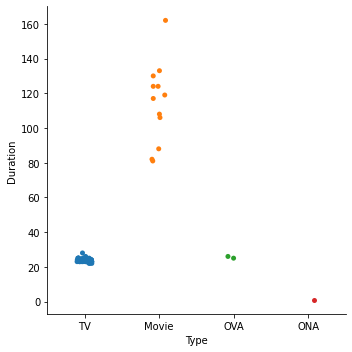

In [8]:
## Join dataA and dataB cant do tho

## So, here, some preprocess
dataB = data2.copy()
display(dataB.head(), dataB.info())

# Change duration to minutes
## Movie
mov = dataB.loc[dataB.Type=="Movie", "Duration"]
spt = mov.str.split(" ", n=-1, expand=True)[[0,2]].astype("int")
dataB.loc[dataB.Type=="Movie", "Duration"] = spt[0]*60 + spt[2]

## Non Movie
nmov = dataB.loc[dataB.Type!="Movie", "Duration"]
dataB.loc[dataB.Type!="Movie", "Duration"] = nmov.str.split(" ", n=-1, expand=True)[0]

## Astype numeric
dataB.Duration = dataB.loc[:, "Duration"].astype("int")

##
dataB.Duration
sns.catplot(y="Duration", x="Type", data=dataB, kind="strip")

In [9]:
## And Insight as well
display(dataB.head(), dataB.Studios.value_counts(), dataB.Type.value_counts(),
        dataB.Duration.value_counts(), dataB["Source"].value_counts())


,Title,Type,Studios,Premiered,Source,MAL Score,Duration
0,Owari no Seraph,TV,Wit Studio,"Apr 4, 2015 to Jun 20, 2015",Manga,7.491,23
1,Lucky Star,TV,Kyoto Animation,"Apr 8, 2007 to Sep 17, 2007",4-koma manga,7.751,24
2,Cardcaptor Sakura,TV,Madhouse,"Apr 7, 1998 to Mar 21, 2000",Manga,8.151,25
3,Kobayashi-san Chi no Maid Dragon,TV,Kyoto Animation,"Jan 12, 2017 to Apr 6, 2017",Manga,7.991,24
4,Nanatsu no Taizai,TV,A-1 Pictures,"Oct 5, 2014 to Mar 29, 2015",Manga,7.801,24


Madhouse                               13
A-1 Pictures                            7
Bones                                   6
Kyoto Animation                         6
Studio Pierrot                          5
Studio Ghibli                           4
Toei Animation                          4
Brain's Base                            3
Sunrise                                 3
Wit Studio                              2
Studio Deen                             2
Shaft                                   2
White Fox                               2
Production I.G                          2
OLM                                     2
MAPPA                                   2
Mushi Production                        1
Lerche                                  1
Yokohama Animation Lab                  1
CoMix Wave Films                        1
David Production                        1
CloverWorks                             1
Asread                                  1
Kinema Citrus                     

TV       74
Movie    12
OVA       2
ONA       1
Name: Type, dtype: int64

24     40
23     18
25     12
22      3
124     2
26      2
82      1
88      1
108     1
81      1
117     1
162     1
119     1
133     1
28      1
106     1
130     1
1       1
Name: Duration, dtype: int64

Manga           52
Original        16
Light novel      8
Novel            6
Web manga        3
Visual novel     2
4-koma manga     1
Game             1
Name: Source, dtype: int64